In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import math
import mne
%matplotlib inline

In [2]:
epochs = mne.read_epochs('Data/epocas/oddball_subsampled_invaders.fif')

Reading /home/ivandanielvillegas/work/home/BrainInvaders/Data/epocas/oddball_subsampled_invaders.fif ...


<ipython-input-2-6e7ffb884ea8>:1: RuntimeWarning: This filename (Data/epocas/oddball_subsampled_invaders.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs('Data/epocas/oddball_subsampled_invaders.fif')


    Found the data of interest:
        t =    -304.00 ...     688.00 ms
        0 CTF compensation matrices available
Not setting metadata
60154 matching events found
No baseline correction applied
0 projection items activated


Not setting metadata
10026 matching events found
No baseline correction applied
0 projection items activated


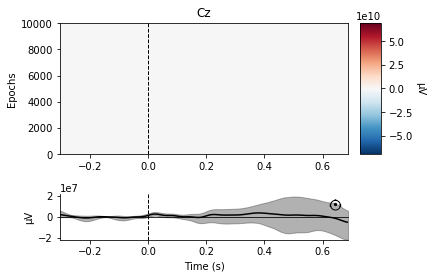

[<Figure size 432x288 with 4 Axes>]

In [3]:
epochs["P300"].plot_image(picks=['Cz'])

Not setting metadata
50128 matching events found
No baseline correction applied
0 projection items activated


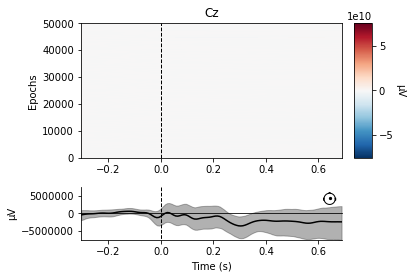

[<Figure size 432x288 with 4 Axes>]

In [4]:
epochs["NoP300"].plot_image(picks=['Cz'])

In [5]:
target = epochs["P300"].average()
target

<Evoked | 'P300' (average, N=10026), -0.304 – 0.688 sec, baseline -0.300781 – 0 sec, 16 ch, ~46 kB>

In [6]:
standart = epochs["NoP300"].average()
standart

<Evoked | 'NoP300' (average, N=50128), -0.304 – 0.688 sec, baseline -0.300781 – 0 sec, 16 ch, ~46 kB>

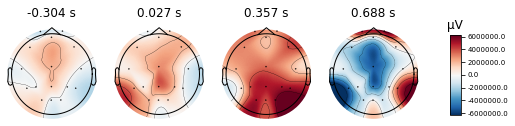

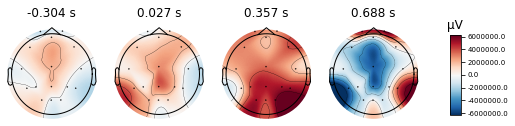

In [7]:
target.plot_topomap()

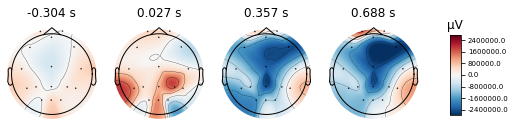

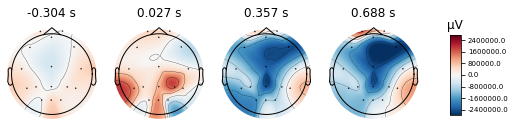

In [8]:
standart.plot_topomap()

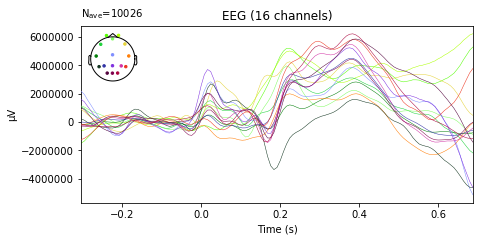

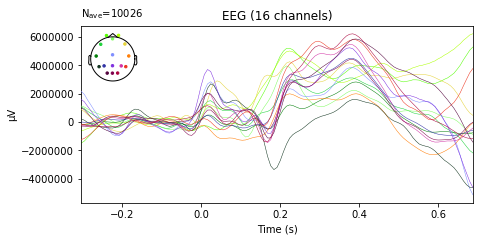

In [9]:
target.plot(time_unit='s',exclude=[])

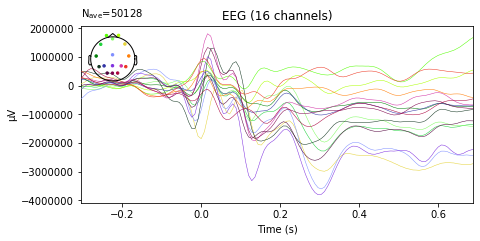

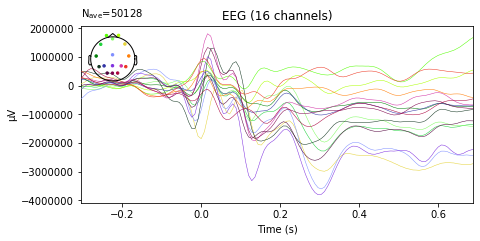

In [10]:
standart.plot(time_unit='s',exclude=[])

No projector specified for this dataset. Please consider the method self.add_proj.


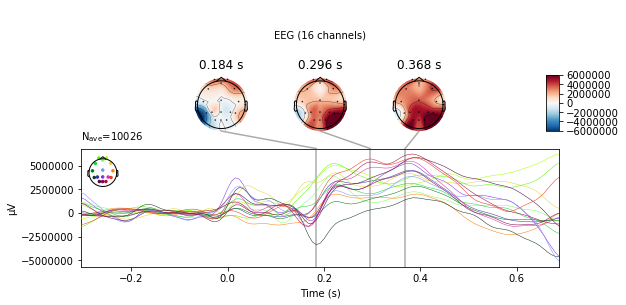

In [11]:
fig=target.plot_joint()
fig.savefig('target_signal_avg_invaders.png')

No projector specified for this dataset. Please consider the method self.add_proj.


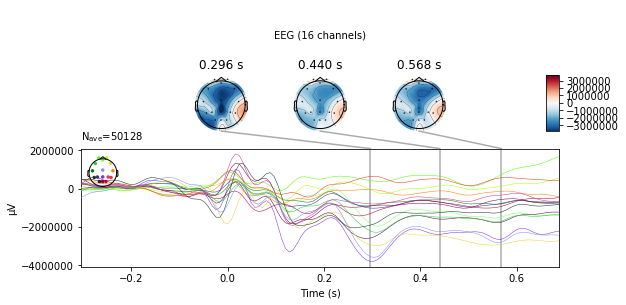

In [12]:
fig=standart.plot_joint()
fig.savefig('standart_signal_avg_invaders.png')

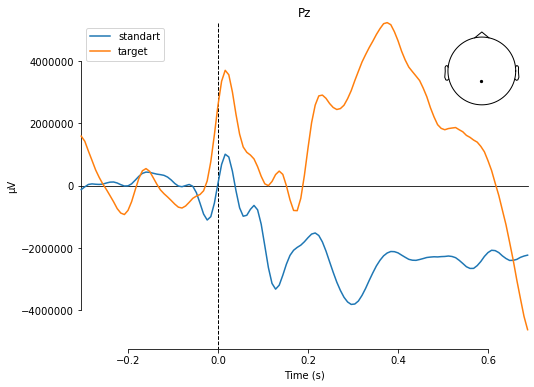

[<Figure size 576x432 with 2 Axes>]

In [13]:
mne.viz.plot_compare_evokeds({"standart":standart,
                              "target":target},picks=[10])

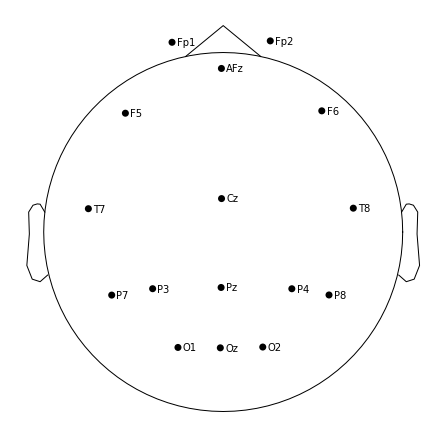

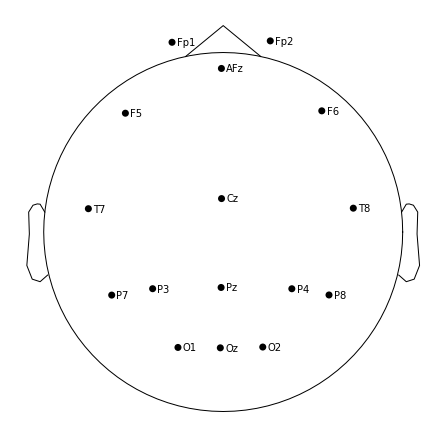

In [14]:
target.plot_sensors(show_names=True)

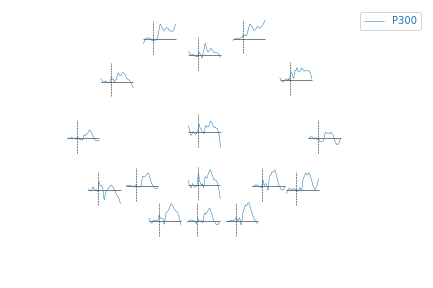

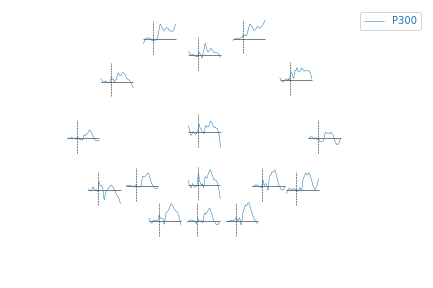

In [15]:
target.plot_topo()

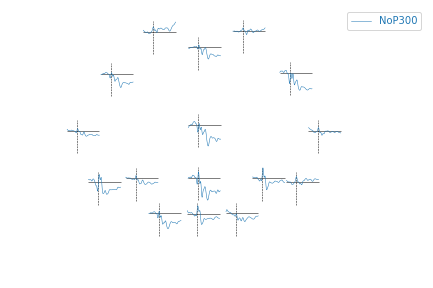

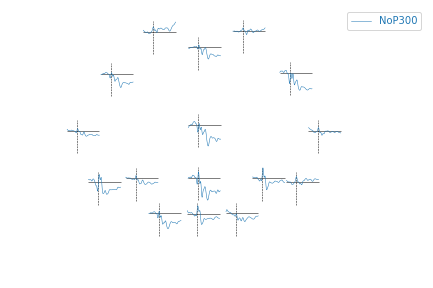

In [16]:
standart.plot_topo()

In [46]:
def escalar_magnitud(data):
    return data * 1e-8

def promedio_electrodos(data):
    print(data.shape)
    promedio = np.mean(data, axis=1)
    return data
    
# Aplicar la función a los datos
#raw_e = raw.copy().apply_function(escalar_magnitud)

In [53]:
electrodos_O = ['O1', 'Oz', 'O2']
electrodos_C = ['Cz']
electrodos_P = ['Pz']

S_O = epochs.copy().set_eeg_reference(ref_channels=electrodos_O)
#S_C = epochs.copy().set_eeg_reference(ref_channels=electrodos_C)
#S_P = epochs.copy().pick_channels(electrodos_P)
S_O.info

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F5, AFz, F6, T7, Cz, T8, P7, P3, Pz, P4, P8, O1, Oz, O2
 chs: 16 EEG
 custom_ref_applied: True
 dig: 19 items (3 Cardinal, 16 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 15.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 125.0 Hz
>

Not setting metadata
10026 matching events found
No baseline correction applied
0 projection items activated


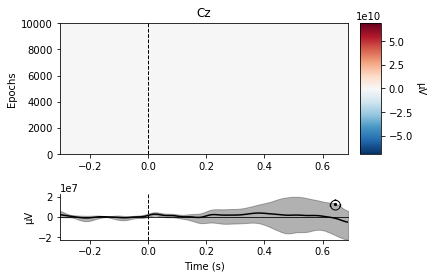

Not setting metadata
10026 matching events found
No baseline correction applied
0 projection items activated


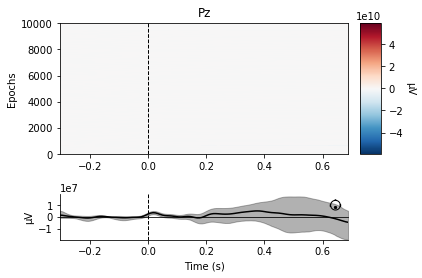

Not setting metadata
10026 matching events found
No baseline correction applied
0 projection items activated


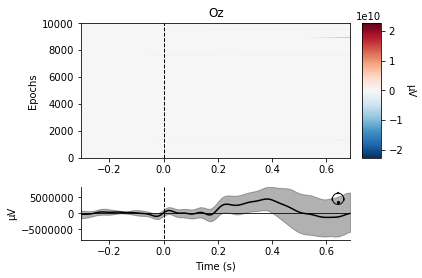

[<Figure size 432x288 with 4 Axes>]

In [33]:
epochs["P300"].plot_image(picks=['Cz'])
epochs["P300"].plot_image(picks=['Pz'])
epochs["P300"].plot_image(picks=['Oz'])

Not setting metadata
50128 matching events found
No baseline correction applied
0 projection items activated


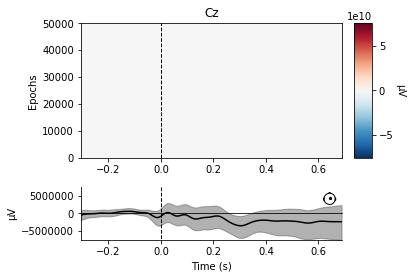

Not setting metadata
50128 matching events found
No baseline correction applied
0 projection items activated


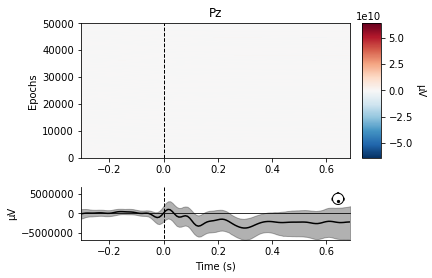

Not setting metadata
50128 matching events found
No baseline correction applied
0 projection items activated


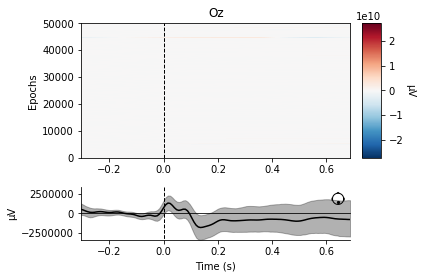

[<Figure size 432x288 with 4 Axes>]

In [31]:
epochs["NoP300"].plot_image(picks=['Cz'])
epochs["NoP300"].plot_image(picks=['Pz'])
epochs["NoP300"].plot_image(picks=['Oz'])

Not setting metadata
10026 matching events found
No baseline correction applied
0 projection items activated


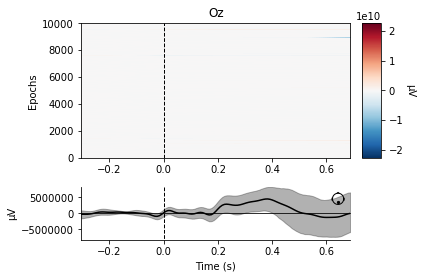

[<Figure size 432x288 with 4 Axes>]

In [24]:
datos, tiempos = raw.copy().pick_channels(electrodos).get_data(return_times=True)


## Media de electrodos

In [4]:
epochs = mne.read_epochs('Data/epocas/elect_mean_epo.fif')

Reading /home/ivandanielvillegas/work/home/BrainInvaders/Data/epocas/elect_mean_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -304.00 ...     688.00 ms
        0 CTF compensation matrices available
Not setting metadata
60154 matching events found
No baseline correction applied
0 projection items activated


Not setting metadata
10026 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-5-eb2e5eb7b421>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs['1'].plot_image(picks=['C'])#P300


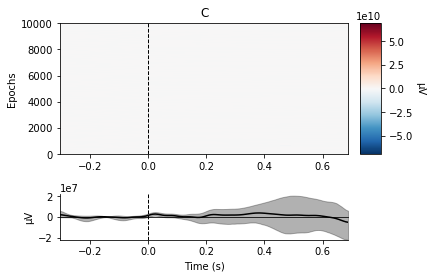

Not setting metadata
50128 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-5-eb2e5eb7b421>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs['0'].plot_image(picks=['C'])#NoP300


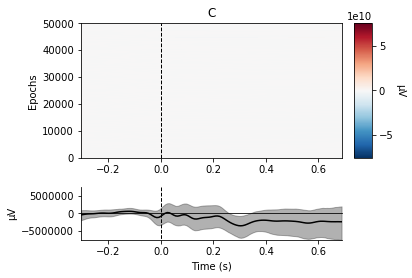

[<Figure size 432x288 with 3 Axes>]

In [5]:
epochs['1'].plot_image(picks=['C'])#P300
epochs['0'].plot_image(picks=['C'])#NoP300

In [6]:
target = epochs["1"].average()
target

<Evoked | '1' (average, N=10026), -0.304 – 0.688 sec, baseline off, 4 ch, ~15 kB>

In [7]:
standart = epochs["0"].average()
standart

<Evoked | '0' (average, N=50128), -0.304 – 0.688 sec, baseline off, 4 ch, ~15 kB>

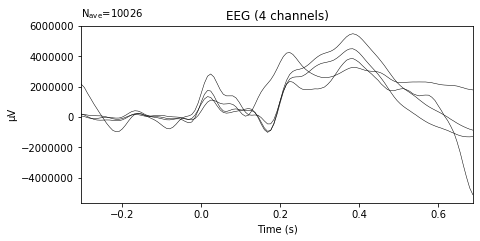

In [8]:
fig = target.plot(time_unit='s',exclude=[])

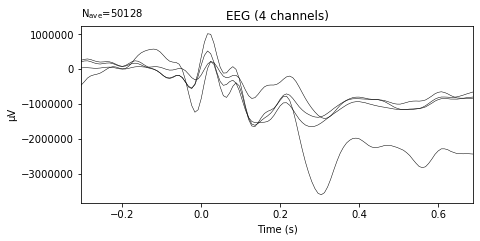

In [9]:
fig = standart.plot(time_unit='s',exclude=[])

<ipython-input-10-1e01016429c6>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  "target":target},picks=['C'])


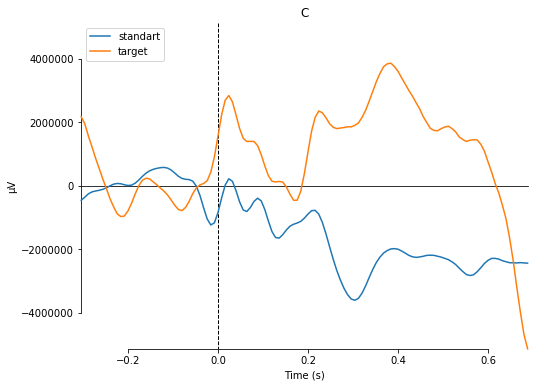

[<Figure size 576x432 with 1 Axes>]

In [10]:
mne.viz.plot_compare_evokeds({"standart":standart,
                              "target":target},picks=['C'])